In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]


## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



Toggle code

In [48]:
f2f_harmonised_values = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')
pan_dataset_allr_values = f2f_harmonised_values[f2f_harmonised_values.columns[-2:][::-1]]
pan_dataset_allr_values = pan_dataset_allr_values.rename(columns = {"ec_left_right_complete":'Economic: Left-Right',"soc_lib_auth_complete":'Social: Liberalism-Conservatism'})

In [77]:
demo_cols = [
#     'housing_det',
             'housing', 
#              'inc',
#              'age', 
#        'inc_det',
             'gender',
#              'gender_complete',
#              'age_left_education',
       'age_left_education_2', 
#              'age_left_education_3', 
             'anyQuals',
#        'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
#        'other_academic_vocational', 'other_tech_business',
#        'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
#        'trade_appenticeship', 'nursing', 'teachers_training',
#        'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
#        'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
#        'rsa_other_commercial', 'school_cert_or_matric',
#        'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
#        'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
#        'professional_qualification', 'spec_qual_gained_at_work',
#        'other_qualification', 'highest_qualification', 'nvq_sqv_l1',
#        'nvq_sqv_l2', 'nvq_sqv_l3', 'nvq_sqv_l4', 'nvq_sqv_l5',
#        'att_university', 'att_commercial_training',
#        'att_polytech_or_techcollege', 'att_night_school',
#        'att_non_voc_training', 'att_other', 'att_art_school',
#        'att_college_of_commerce', 'att_teacher_training',
#        'att_trade_military_apprent', 'att_tech_college_teacher_nursing',
#        'att_tech_or_occ_training', 'att_summer_schl_corresp_courses',
#        'att_NoFE', 'att_forces_training', 'school_type', 'school_selective',
#        'school_fees', 'school_fees_when', 'school_where', 'school_type_2',
#        'decade',
#              'generation',
             'inc_norm',
#              'inc_norm_wt',
#        'inc(quartile)'
            ]

In [78]:
BES_Panel = f2f_harmonised[demo_cols]
BES_Panel[pan_dataset_allr_values.columns] = pan_dataset_allr_values
BES_Panel["bloc_binary"] = f2f_harmonised["bloc_complete"].replace({"Left-Lib":1,"Right-Auth":0,"Neither":np.nan})
# BES_Panel.drop(["age_left_education","age_left_education_3"],axis=1,inplace=True)
BES_Panel = pd.get_dummies(BES_Panel)
BES_Panel = BES_Panel[BES_Panel[pan_dataset_allr_values.columns].notnull().all(axis=1)]

In [15]:
f2f_harmonised["bloc_complete"].value_counts(dropna=False)

Left-Lib      24460
Right-Auth    17675
Neither        9997
NaN             599
Name: bloc_complete, dtype: int64

[0]	validation_0-rmse:0.49526	validation_1-rmse:0.49550
[1]	validation_0-rmse:0.49117	validation_1-rmse:0.49153
[2]	validation_0-rmse:0.48705	validation_1-rmse:0.48762
[3]	validation_0-rmse:0.48357	validation_1-rmse:0.48426
[4]	validation_0-rmse:0.48058	validation_1-rmse:0.48135
[5]	validation_0-rmse:0.47795	validation_1-rmse:0.47882
[6]	validation_0-rmse:0.47503	validation_1-rmse:0.47609
[7]	validation_0-rmse:0.47349	validation_1-rmse:0.47467
[8]	validation_0-rmse:0.47129	validation_1-rmse:0.47254
[9]	validation_0-rmse:0.46868	validation_1-rmse:0.47016
[10]	validation_0-rmse:0.46705	validation_1-rmse:0.46865
[11]	validation_0-rmse:0.46503	validation_1-rmse:0.46672
[12]	validation_0-rmse:0.46382	validation_1-rmse:0.46562
[13]	validation_0-rmse:0.46207	validation_1-rmse:0.46397
[14]	validation_0-rmse:0.46060	validation_1-rmse:0.46256
[15]	validation_0-rmse:0.45885	validation_1-rmse:0.46101
[16]	validation_0-rmse:0.45791	validation_1-rmse:0.46022
[17]	validation_0-rmse:0.45691	validation

[144]	validation_0-rmse:0.42566	validation_1-rmse:0.43915
[145]	validation_0-rmse:0.42560	validation_1-rmse:0.43916
[146]	validation_0-rmse:0.42552	validation_1-rmse:0.43915
[147]	validation_0-rmse:0.42548	validation_1-rmse:0.43912
[148]	validation_0-rmse:0.42541	validation_1-rmse:0.43912
[149]	validation_0-rmse:0.42533	validation_1-rmse:0.43912
[150]	validation_0-rmse:0.42526	validation_1-rmse:0.43913
[151]	validation_0-rmse:0.42521	validation_1-rmse:0.43913
[152]	validation_0-rmse:0.42513	validation_1-rmse:0.43915
[153]	validation_0-rmse:0.42507	validation_1-rmse:0.43915
[154]	validation_0-rmse:0.42498	validation_1-rmse:0.43914
[155]	validation_0-rmse:0.42494	validation_1-rmse:0.43914
[156]	validation_0-rmse:0.42486	validation_1-rmse:0.43912
[157]	validation_0-rmse:0.42479	validation_1-rmse:0.43909
[158]	validation_0-rmse:0.42471	validation_1-rmse:0.43909
[159]	validation_0-rmse:0.42466	validation_1-rmse:0.43906
[160]	validation_0-rmse:0.42459	validation_1-rmse:0.43907
[161]	validati

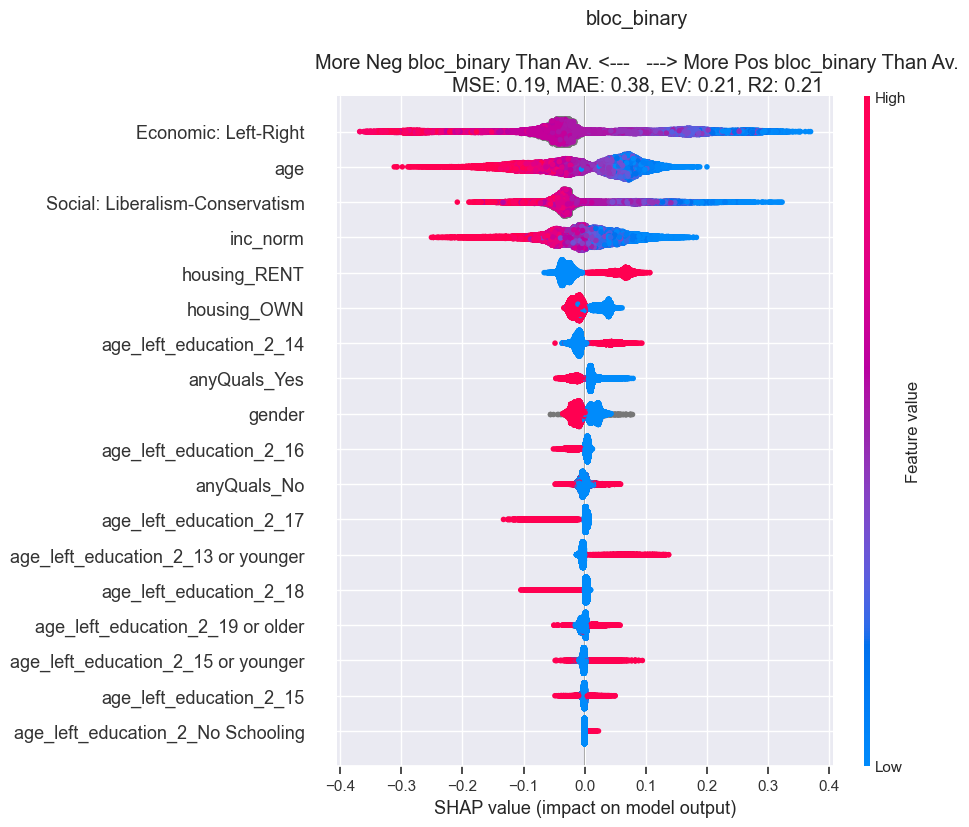

In [71]:
base=  'bloc_binary'
Treatment='Predict_bloc_binary'
var_stub='bloc_binary'
var_list = ['bloc_binary']
var_stub_list = [var_stub]
# var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
# var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
# var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
#        'Winner17_reinstated', 'Winner17_changed_party']

# mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


# df=numdf_3.drop(np.nan,axis=1).copy()
# df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=BES_Panel,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(BES_Panel.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [47]:
# R2 .22
# drops a little if you replace housing_det with housing

['Economic: Left <-> Right', 'Social: Liberalism <-> Conservatism']

In [ ]:
# now try with just entries which have value data

[0]	validation_0-rmse:0.49305	validation_1-rmse:0.49332
[1]	validation_0-rmse:0.48693	validation_1-rmse:0.48751
[2]	validation_0-rmse:0.48153	validation_1-rmse:0.48241
[3]	validation_0-rmse:0.47641	validation_1-rmse:0.47754
[4]	validation_0-rmse:0.47353	validation_1-rmse:0.47476
[5]	validation_0-rmse:0.47091	validation_1-rmse:0.47228
[6]	validation_0-rmse:0.46680	validation_1-rmse:0.46833
[7]	validation_0-rmse:0.46269	validation_1-rmse:0.46446
[8]	validation_0-rmse:0.45852	validation_1-rmse:0.46057
[9]	validation_0-rmse:0.45448	validation_1-rmse:0.45693
[10]	validation_0-rmse:0.45136	validation_1-rmse:0.45407
[11]	validation_0-rmse:0.44875	validation_1-rmse:0.45164
[12]	validation_0-rmse:0.44555	validation_1-rmse:0.44870
[13]	validation_0-rmse:0.44325	validation_1-rmse:0.44661
[14]	validation_0-rmse:0.44156	validation_1-rmse:0.44511
[15]	validation_0-rmse:0.43999	validation_1-rmse:0.44378
[16]	validation_0-rmse:0.43735	validation_1-rmse:0.44141
[17]	validation_0-rmse:0.43556	validation

[144]	validation_0-rmse:0.39053	validation_1-rmse:0.41214
[145]	validation_0-rmse:0.39040	validation_1-rmse:0.41210
[146]	validation_0-rmse:0.39024	validation_1-rmse:0.41208
[147]	validation_0-rmse:0.39012	validation_1-rmse:0.41211
[148]	validation_0-rmse:0.38995	validation_1-rmse:0.41213
[149]	validation_0-rmse:0.38981	validation_1-rmse:0.41213
[150]	validation_0-rmse:0.38971	validation_1-rmse:0.41212
[151]	validation_0-rmse:0.38956	validation_1-rmse:0.41212
[152]	validation_0-rmse:0.38947	validation_1-rmse:0.41208
[153]	validation_0-rmse:0.38938	validation_1-rmse:0.41208
[154]	validation_0-rmse:0.38935	validation_1-rmse:0.41208
[155]	validation_0-rmse:0.38922	validation_1-rmse:0.41208
[156]	validation_0-rmse:0.38906	validation_1-rmse:0.41208
[157]	validation_0-rmse:0.38888	validation_1-rmse:0.41208
[158]	validation_0-rmse:0.38876	validation_1-rmse:0.41205
[159]	validation_0-rmse:0.38865	validation_1-rmse:0.41210
[160]	validation_0-rmse:0.38853	validation_1-rmse:0.41207
[161]	validati

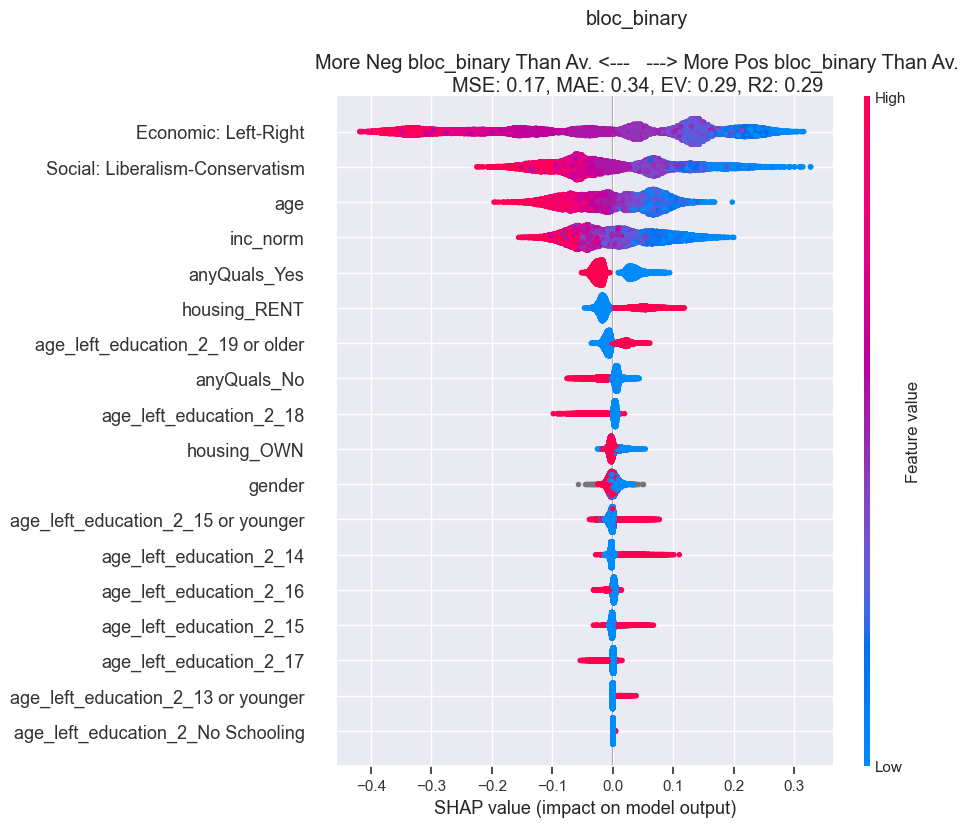

In [76]:
base=  'bloc_binary'
Treatment='Predict_bloc_binary'
var_stub='bloc_binary'
var_list = ['bloc_binary']
var_stub_list = [var_stub]
# var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
# var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
# var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
#        'Winner17_reinstated', 'Winner17_changed_party']

# mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


# df=numdf_3.drop(np.nan,axis=1).copy()
# df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=BES_Panel,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(BES_Panel.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [54]:
# given that Age is largely competing with Social Liberalism-Conservatism, see what happens if you drop
# r2 = .29

1.0    28316
0.0    24415
Name: gender_complete, dtype: int64

[0]	validation_0-rmse:0.49318	validation_1-rmse:0.49345
[1]	validation_0-rmse:0.48699	validation_1-rmse:0.48754
[2]	validation_0-rmse:0.48124	validation_1-rmse:0.48199
[3]	validation_0-rmse:0.47592	validation_1-rmse:0.47689
[4]	validation_0-rmse:0.47321	validation_1-rmse:0.47436
[5]	validation_0-rmse:0.47143	validation_1-rmse:0.47272
[6]	validation_0-rmse:0.46672	validation_1-rmse:0.46828
[7]	validation_0-rmse:0.46461	validation_1-rmse:0.46627
[8]	validation_0-rmse:0.46264	validation_1-rmse:0.46445
[9]	validation_0-rmse:0.45897	validation_1-rmse:0.46102
[10]	validation_0-rmse:0.45528	validation_1-rmse:0.45757
[11]	validation_0-rmse:0.45186	validation_1-rmse:0.45435
[12]	validation_0-rmse:0.44866	validation_1-rmse:0.45146
[13]	validation_0-rmse:0.44578	validation_1-rmse:0.44878
[14]	validation_0-rmse:0.44333	validation_1-rmse:0.44654
[15]	validation_0-rmse:0.44126	validation_1-rmse:0.44465
[16]	validation_0-rmse:0.43894	validation_1-rmse:0.44250
[17]	validation_0-rmse:0.43683	validation

[144]	validation_0-rmse:0.39984	validation_1-rmse:0.41704
[145]	validation_0-rmse:0.39972	validation_1-rmse:0.41699
[146]	validation_0-rmse:0.39964	validation_1-rmse:0.41695
[147]	validation_0-rmse:0.39953	validation_1-rmse:0.41689
[148]	validation_0-rmse:0.39946	validation_1-rmse:0.41682
[149]	validation_0-rmse:0.39936	validation_1-rmse:0.41681
[150]	validation_0-rmse:0.39919	validation_1-rmse:0.41677
[151]	validation_0-rmse:0.39906	validation_1-rmse:0.41674
[152]	validation_0-rmse:0.39893	validation_1-rmse:0.41674
[153]	validation_0-rmse:0.39886	validation_1-rmse:0.41674
[154]	validation_0-rmse:0.39884	validation_1-rmse:0.41674
[155]	validation_0-rmse:0.39871	validation_1-rmse:0.41673
[156]	validation_0-rmse:0.39865	validation_1-rmse:0.41668
[157]	validation_0-rmse:0.39857	validation_1-rmse:0.41666
[158]	validation_0-rmse:0.39848	validation_1-rmse:0.41666
[159]	validation_0-rmse:0.39833	validation_1-rmse:0.41666
[160]	validation_0-rmse:0.39828	validation_1-rmse:0.41662
[161]	validati

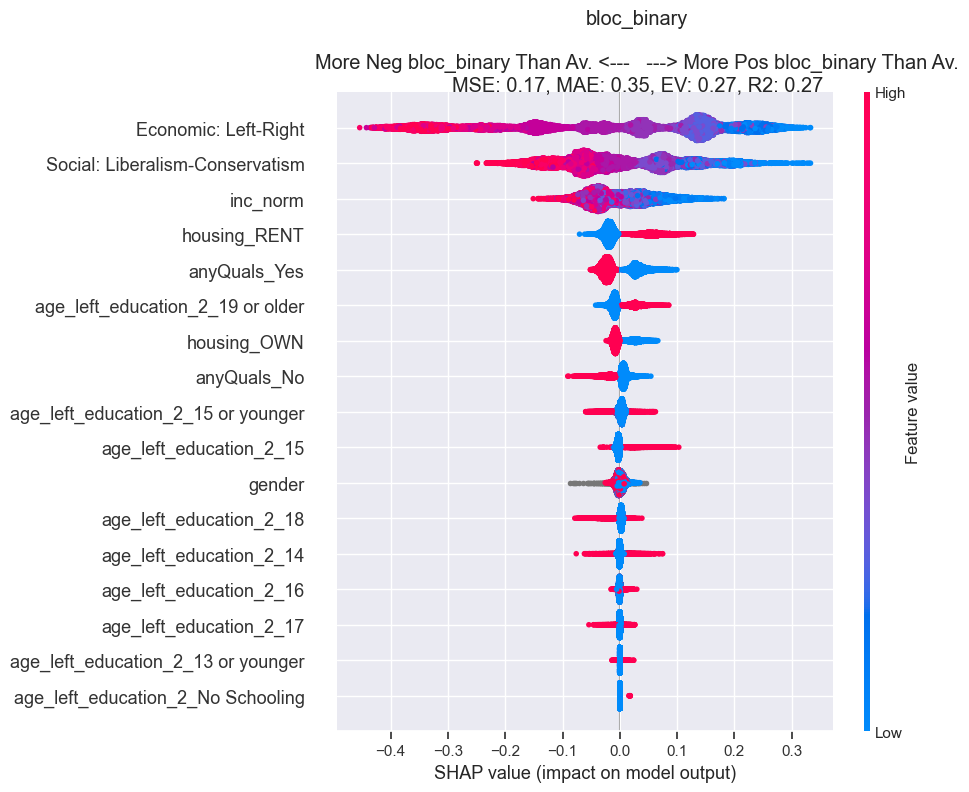

In [79]:
base=  'bloc_binary'
Treatment='Predict_bloc_binary'
var_stub='bloc_binary'
var_list = ['bloc_binary']
var_stub_list = [var_stub]
# var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
# var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
# var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
#        'Winner17_reinstated', 'Winner17_changed_party']

# mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


# df=numdf_3.drop(np.nan,axis=1).copy()
# df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=BES_Panel,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(BES_Panel.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [59]:
# drops to r2 .27